In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [29]:
env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n,env.action_space.n]) #Initialize table with all zeros

dis = 0.99
learning_rate = .85
num_episodes = 3000 #set learning parameters

rList=[]
for i in range(num_episodes):
    state=env.reset() #reset environment
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)/(i+1))
        new_state, reward, done,_ = env.step(action) #get new stse and reward from enviroment
        Q[state,action] = (1-learning_rate)*Q[state,action] + learning_rate*(reward+dis * np.max(Q[new_state,:]))
        rAll +=reward
        state = new_state
    rList.append(rAll)

Success rate: 0.49933333333333335
Rinal Q-Table Values
Left Down Right Up
[[1.68894305e-02 5.10339064e-01 1.18655467e-02 1.30222622e-02]
 [2.66642639e-05 1.02206912e-03 1.18345658e-03 4.99175450e-01]
 [3.34779874e-03 4.69962841e-03 1.55571799e-03 3.87069276e-01]
 [1.32986187e-03 0.00000000e+00 9.93127095e-04 2.76441510e-01]
 [7.00599849e-01 4.73299564e-06 1.19361917e-03 3.67093306e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.76743716e-01 8.06864892e-05 2.91668773e-05 8.27182478e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.36074200e-03 1.35022006e-03 5.08224970e-01]
 [1.17384973e-03 6.10944997e-01 0.00000000e+00 1.41186120e-03]
 [7.50208457e-01 6.38722841e-04 6.30186318e-05 6.07729684e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.38556222e-01 7.83328228e-03]
 [0.00000000e+00 9.65020847e-01 0.00000000e+

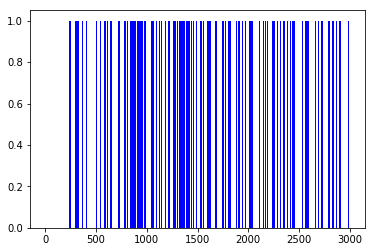

In [30]:
print("Success rate: " +str(sum(rList)/num_episodes))
print("Rinal Q-Table Values")
print("Left Down Right Up")
print(Q)
plt.bar(range(len(rList)),rList,color='blue')
plt.show()